In [6]:
import json
import subprocess
import sys

def ensure_package(import_name: str, install_name: str | None = None) -> None:
    """Install a pip package if missing (best-effort)."""
    install_name = install_name or import_name
    result = subprocess.run(
        [sys.executable, '-m', 'pip', 'list', '--format=json'],
        check=True,
        capture_output=True,
        text=True,
    )
    installed = {pkg['name'].lower() for pkg in json.loads(result.stdout)}
    # Some packages have different import vs distribution names (e.g., rdkit-pypi -> rdkit)
    if import_name.lower() in installed or (install_name and install_name.lower() in installed):
        print(f'{import_name} already installed.')
        return
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', install_name])
    print(f'Installed {install_name} (import as {import_name}).')
    
for pkg in [
    ('scikit-learn', 'scikit-learn'),
    ('lightgbm', 'lightgbm'),
    ('shap', 'shap'),
    ('IProgress ', 'ipywidgets'),
]:
    try:
        ensure_package(pkg[0], pkg[1])
    except Exception as exc:
        print(f"Package install check failed for {pkg}: {exc}")

import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold
#stratifed kfold 
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

scikit-learn already installed.
lightgbm already installed.
shap already installed.
IProgress  already installed.


In [7]:
#import model
MODEL_PATH = Path('result/model')

import joblib
#find newest modle file
model_files = list(MODEL_PATH.glob('lgbm_model_*.joblib'))
latest_model_file = max(model_files, key=lambda x: x.stat().st_mtime)
#load model
model = joblib.load(latest_model_file)  

In [ ]:
import pandas as pd
import numpy as np
import shap 

In [ ]:
#import data 

data = pd.read_csv('result/data/train_organic_heteroatom_containing_GA_features.csv')

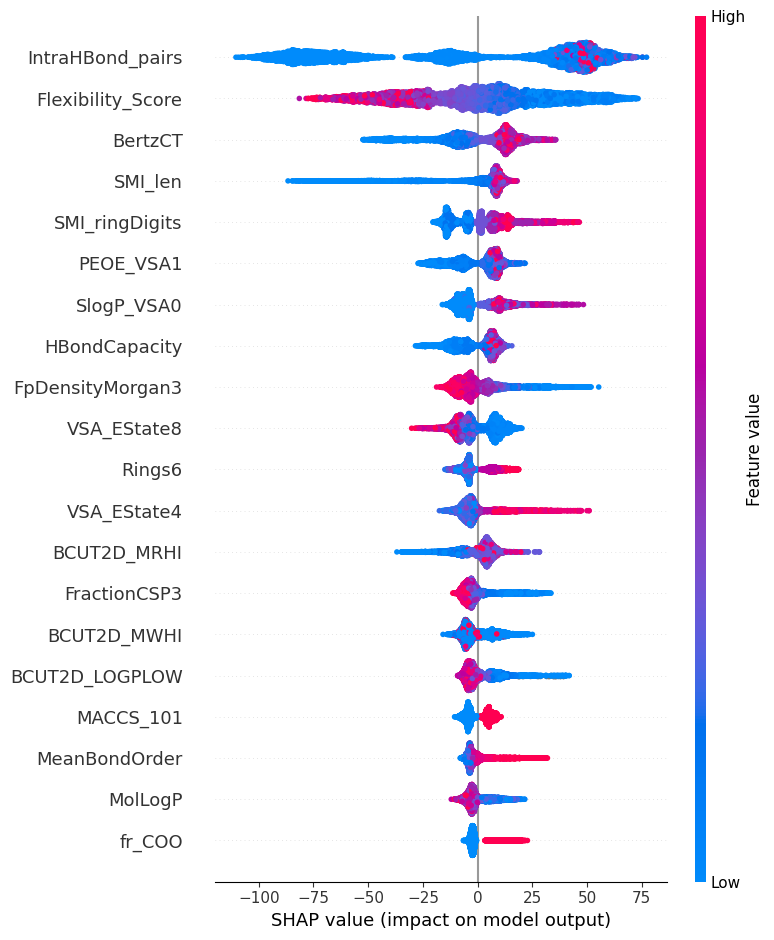

In [17]:
X_train = data.drop(columns=['Tm'])
y_train = data['Tm']

explainer = shap.Explainer(model)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)